In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

In [2]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


Data files preprocessed ...

un h@@ om@@ me et une f@@ em@@ me qu@@ i m@@ ar@@ ch@@ en@@ t en v@@ il@@ le

un h@@ om@@ me et une f@@ em@@ me qu@@ i m@@ ar@@ ch@@ en@@ t en v@@ il@@ le

une ca@@ s@@ ca@@ de d@@ an@@ s une for@@ ê@@ t avec de n@@ om@@ b@@ re@@ ux ar@@ b@@ r@@ es

une ca@@ s@@ ca@@ de d@@ an@@ s une for@@ ê@@ t avec de n@@ om@@ b@@ re@@ ux ar@@ b@@ r@@ es

une a@@ b@@ e@@ il@@ le pl@@ an@@ ant a@@ u@@ -@@ de@@ s@@ su@@ s de f@@ l@@ e@@ ur@@ s v@@ i@@ ol@@ e@@ t@@ t@@ es et or@@ an@@ g@@ es .

un l@@ a@@ c p@@ a@@ i@@ si@@ b@@ le en@@ t@@ ou@@ r@@ é d&apos; ar@@ b@@ r@@ es et de ro@@ ch@@ er@@ s .

de@@ ux per@@ s@@ on@@ n@@ es sur un t@@ er@@ ra@@ in de f@@ oo@@ t@@ b@@ all a@@ m@@ é@@ ri@@ ca@@ in , l&apos; une a@@ u s@@ o@@ l .

un j@@ e@@ une h@@ om@@ me f@@ a@@ i@@ t une ca@@ s@@ ca@@ de en l&apos; a@@ i@@ r sur un s@@ k@@ at@@ e@@ bo@@ ar@@ d .

de@@ ux ch@@ i@@ en@@ s c@@ ou@@ r@@ ant le l@@ on@@ g de l@@ a pla@@ ge

de@@ ux ch@@ i@@ en@@ s c@@ ou@@ r@@ ant le l@@ o

0m 6s (- 0m 2s) (72 72%) 2.7276
0m 7s (- 0m 2s) (76 76%) 3.0499
0m 7s (- 0m 1s) (80 80%) 3.0099
0m 7s (- 0m 1s) (84 84%) 2.9156
0m 8s (- 0m 1s) (88 88%) 2.4895
0m 8s (- 0m 0s) (92 92%) 2.9692
0m 8s (- 0m 0s) (96 96%) 2.3091
0m 9s (- 0m 0s) (100 100%) 2.6561
Training finished ...



<Figure size 432x288 with 0 Axes>

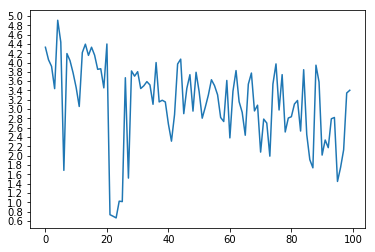

Losses diagram saved in TODO
Models saved in TODO

un h@@ om@@ me et une f@@ em@@ me qu@@ i m@@ ar@@ ch@@ en@@ t en v@@ il@@ le

un h@@ om@@ me et une f@@ em@@ me qu@@ i m@@ ar@@ ch@@ en@@ t en v@@ il@@ le

une ca@@ s@@ ca@@ de d@@ an@@ s une for@@ ê@@ t avec de n@@ om@@ b@@ re@@ ux ar@@ b@@ r@@ es

une ca@@ s@@ ca@@ de d@@ an@@ s une for@@ ê@@ t avec de n@@ om@@ b@@ re@@ ux ar@@ b@@ r@@ es

une a@@ b@@ e@@ il@@ le pl@@ an@@ ant a@@ u@@ -@@ de@@ s@@ su@@ s de f@@ l@@ e@@ ur@@ s v@@ i@@ ol@@ e@@ t@@ t@@ es et or@@ an@@ g@@ es .

un l@@ a@@ c p@@ a@@ i@@ si@@ b@@ le en@@ t@@ ou@@ r@@ é d&apos; ar@@ b@@ r@@ es et de ro@@ ch@@ er@@ s .

de@@ ux per@@ s@@ on@@ n@@ es sur un t@@ er@@ ra@@ in de f@@ oo@@ t@@ b@@ all a@@ m@@ é@@ ri@@ ca@@ in , l&apos; une a@@ u s@@ o@@ l .

un j@@ e@@ une h@@ om@@ me f@@ a@@ i@@ t une ca@@ s@@ ca@@ de en l&apos; a@@ i@@ r sur un s@@ k@@ at@@ e@@ bo@@ ar@@ d .

de@@ ux ch@@ i@@ en@@ s c@@ ou@@ r@@ ant le l@@ on@@ g de l@@ a pla@@ ge

de@@ ux ch@@ i@@ en@@ s c@@

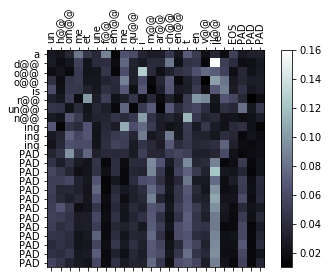

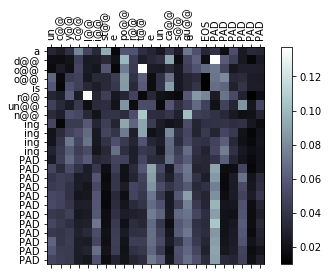

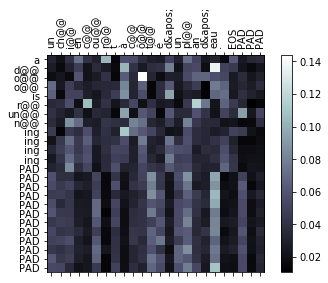

Attention diagrams saved in TODO


In [3]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 100 #1500
max_hours = 9

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    useCache = False)


In [ ]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 9


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = False, useCache = False)


In [ ]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 100000
max_hours = 10

MAX_LENGTH = 50
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = True, useCache = False)
